<p style="font-weight:bold; letter-spacing: 2px; color:#F5F5DC; font-size:140%; text-align:left; max-width: 1050px; padding: 10px; border-bottom: 3px solid #D2B48C"> Exploratory Data Analysis on Sleep Disorder Prediction</p>

In [6]:
# import custom classes, functions and variables. Reload file in to memory on cell excution.
import importlib
import settings
importlib.reload(settings)

# import data frameworks
import pandas as pd
import numpy as np

# import viz
import matplotlib.pyplot as plt
import seaborn as sns

# import stats
import scipy.stats as stats

# import others
import os

#### Import data

In [7]:
df = pd.read_csv(os.path.join(settings.DATA_RAW_DIR, settings.DATA_RAW_FILE), sep=",")

# Univariate analysis

*Data types and missing values*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


*Sense check on values*

In [9]:
settings.examine_values(df)

,Unique Values
Person ID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
Gender,"[Male, Female]"
Age,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]"
Occupation,"[Software Engineer, Doctor, Sales Representative, Teacher, Nurse, Engineer, Accountant, Scientist, Lawyer, Salesperson, Manager]"
Sleep Duration,"[6.1, 6.2, 5.9, 6.3, 7.8, 6.0, 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2, 5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8.0, 6.8, 8.1, 8.3, 8.5, 8.4, 8.2]"
Quality of Sleep,"[6, 4, 7, 5, 8, 9]"
Physical Activity Level,"[42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85]"
Stress Level,"[6, 8, 7, 4, 3, 5]"
BMI Category,"[Overweight, Normal, Obese, Normal Weight]"
Blood Pressure,"[126/83, 125/80, 140/90, 120/80, 132/87, 130/86, 117/76, 118/76, 128/85, 131/86, 128/84, 115/75, 135/88, 129/84, 130/85, 115/78, 119/77, 121/79, 125/82, 135/90, 122/80, 142/92, 140/95, 139/91, 118/75]"


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Dataset at a Glance:</font></h3>

<ul>
    <li><b>Data Size</b>: The dataset contains 374 rows and 13 columns. It is therefore a small dataset.</li>
    <li><b>Data Types</b>: The data contains features with data types int64, float64 and object. All are in their correct data type.</li>
    <li><b>Missing Values</b>: No column has missing values in the dataset and it doesn't appear that missing values have been encoded as something else.</li>
    <li><b>Sense check</b>: Overall numerical and categorical values appear sensible.
        <ul>
            <li><b>Quantitative Continuous Columns:</b> 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Age'</li>
            <li><b>Quantitative Ordinal Columns:</b> 'Quality of Sleep', 'Stress Level'</li> 
            <li><b>Categorical Ordinal Columns:</b> 'BMI Category', 'Blood Pressure'</li>
            <li><b>Categorical Nominal Columns:</b> 'Occupation'</li>
            <li><b>Categorical Binary Columns:</b> 'Gender'</li>
            <li>The 'BMI' column has two categories representing the same thing under a different name ("Normal" and "Normal Weight").</li>
            <li>The 'Blood Pressure' column has many unique composed-numeric values making it somewhat categorical. This could be more informative binned as true categories.</li>
        </ul>
    </li>
    <li><b>Irrelevant Features</b>: The 'Person ID' column won't provide meaningful insights for analysis and should be dropped.</li>
    <li><b>Multi-label Classification</b>: This dataset poses a multi-class classification task with 'None', 'Apnea' and 'Insomnia' serving as 3 potential labels.</li>
</ul>
</div>


In [10]:
# Rectification and check
map = {"Overweight":"Overweight", "Normal":"Normal", "Obese":"Obese", "Normal Weight":"Normal"}
# apply mapping function
settings.column_mapper(df, "BMI Category", map)
# check new values in consolidated column
settings.examine_values(df).loc["BMI Category",:]

Unique Values    [Overweight, Normal, Obese]
Name: BMI Category, dtype: object

In [11]:
# Rectification and check
# split blood pressure to sys and dial
df["Blood Pressure Sys"] = df["Blood Pressure"].apply(lambda x: int(x.split("/")[0]))
df["Blood Pressure Dial"] = df["Blood Pressure"].apply(lambda x: int(x.split("/")[1]))

# set up conditions
conditions = [
    (df["Blood Pressure Sys"] < 120) & (df["Blood Pressure Dial"] < 80),
    ((df["Blood Pressure Sys"] >= 120) & (df["Blood Pressure Sys"] < 129)) & (df["Blood Pressure Dial"] < 90),
    ((df["Blood Pressure Sys"] > 130) & (df["Blood Pressure Sys"] < 139)) | ((df["Blood Pressure Dial"] > 80) & (df["Blood Pressure Dial"] < 90)),
    (df["Blood Pressure Sys"] >= 140) | (df["Blood Pressure Dial"] >= 90),
    (df["Blood Pressure Sys"] >= 180) | (df["Blood Pressure Dial"] >= 120)
]
# set up corresponding categories
values = ['Normal', 'Elevated', 'High Blood Pressure Stage 1', 'High Blood Pressure Stage 2', 'Hypertension Crisis']

# Create a new column "Blood Pressure Category" and map
df['Blood Pressure Category'] = np.select(conditions, values)
# Check values
settings.examine_values(df).loc[["Blood Pressure Sys","Blood Pressure Dial", "Blood Pressure Category"],:]

,Unique Values
Blood Pressure Sys,"[126, 125, 140, 120, 132, 130, 117, 118, 128, 131, 115, 135, 129, 119, 121, 122, 142, 139]"
Blood Pressure Dial,"[83, 80, 90, 87, 86, 76, 85, 84, 75, 88, 78, 77, 79, 82, 92, 95, 91]"
Blood Pressure Category,"[Elevated, High Blood Pressure Stage 2, High Blood Pressure Stage 1, Normal]"


In [12]:
# Rectification and check
df = df.drop("Person ID", axis=1)
if "Person ID" not in settings.examine_values(df).index.to_list():
    print("Person ID removed")

Person ID removed


*Numerical descriptive stats*

In [13]:
cols = ['Quality of Sleep', 'Stress Level', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Age']
settings.numerical_univariate_summary(dataframe=df, numerical_columns=cols)

,count,mean,std,min,q1,q2,q3,max,kurtosis,skewness,outlier_flag
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.0,7.0,8.0,9.0,-0.754309,-0.206615,False
Stress Level,374.0,5.385027,1.774526,3.0,4.0,5.0,7.0,8.0,-1.325628,0.15371,False
Sleep Duration,374.0,7.132086,0.795657,5.8,6.4,7.2,7.8,8.5,-1.285371,0.037404,False
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.0,60.0,75.0,90.0,-1.265205,0.074188,False
Heart Rate,374.0,70.165775,4.135676,65.0,68.0,70.0,72.0,86.0,2.240001,1.219906,True
Daily Steps,374.0,6816.84492,1617.915679,3000.0,5600.0,7000.0,8000.0,10000.0,-0.404782,0.177562,False
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0,-0.913662,0.256189,False


*Numerical distribution visualisation*

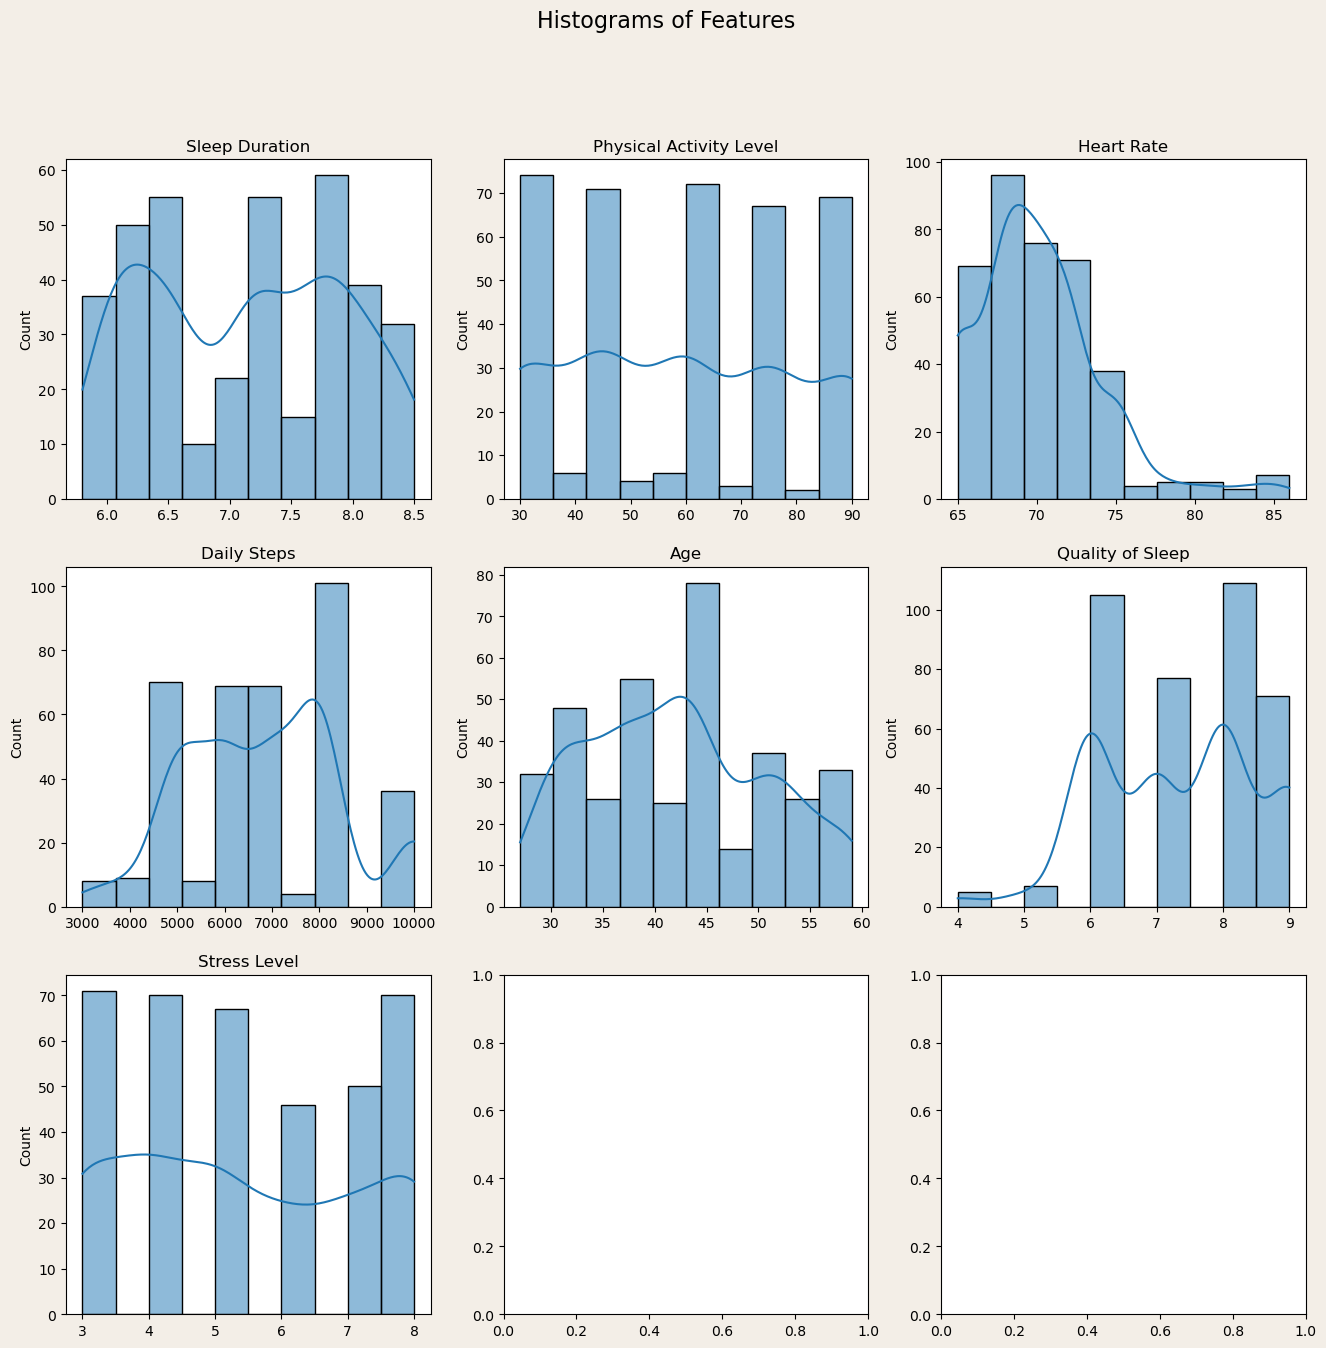

In [14]:
cols = ['Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Age', 'Quality of Sleep', 'Stress Level']

fig, axs = plt.subplots(3, 3, figsize=(16, 15), facecolor="#F3EEE7")
for i, col in enumerate(cols):
    sns.histplot(df[col], bins=10, kde=True, ax=axs[int(i/3), i%3])
    axs[int(i/3), i%3].set_title(f'{col}')    
    axs[int(i/3), i%3].set_xlabel("")

plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>All values appear to be within reasonable min and max ranges. An outlier is detected in the Heart Rate field but 86 is within normal physiological range for people and reflects the relative small sample set instead</li>
    <li>Daily Steps has a much higher mean and variance than other fields, Physical Activity as well but less so. Scaling will be important to scale features.</li>
    <li>Distribitions seem to be varied and none are very clear. Heart rate and Quality of Sleep could be right and left skewed distribitions, respectively, and daily steps and age could be approximately normal. Others appear uniform or bi-modal. Some distributions look very patchy which signals potential problems in data collection. For example, it's not clear why Physical Activity would have 5 strong bars and gaps inbetween - likely collected through a questionnaire (people "round up") rather than tracking software.</li>
    
</ul>
</div>


*Categorical Descriptive Stats*

In [15]:
cols = ["BMI Category", "Blood Pressure Category", "Occupation", "Gender"]
settings.categorical_univariate_summary(df, categorical_columns=cols)

,distinct_count,value_counts
BMI Category,3,"Normal 216 Overweight 148 Obese 10 Name: BMI Category, dtype: int64"
Blood Pressure Category,4,"High Blood Pressure Stage 1 137 Elevated 123 High Blood Pressure Stage 2 73 Normal 41 Name: Blood Pressure Category, dtype: int64"
Occupation,11,"Nurse 73 Doctor 71 Engineer 63 Lawyer 47 Teacher 40 Accountant 37 Salesperson 32 Software Engineer 4 Scientist 4 Sales Representative 2 Manager 1 Name: Occupation, dtype: int64"
Gender,2,"Male 189 Female 185 Name: Gender, dtype: int64"


*Categorical count visualisation*

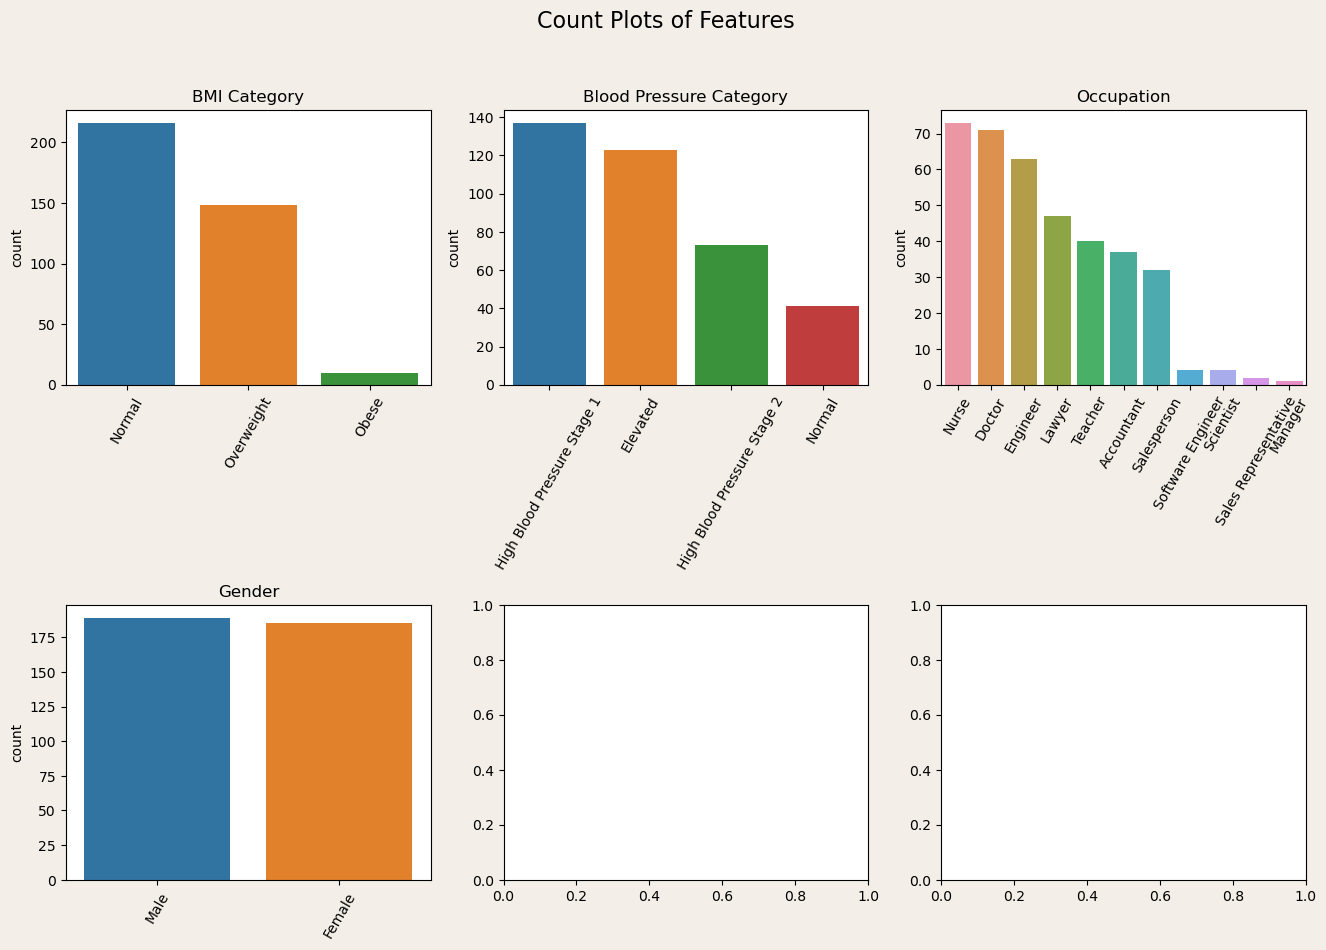

In [16]:
cols = ["BMI Category", "Blood Pressure Category", "Occupation", "Gender"]

fig, axs = plt.subplots(2, 3, figsize=(16, 10), gridspec_kw={'hspace': 0.8}, facecolor="#F3EEE7")
for i, col in enumerate(cols):
    column_data = df[col]
    order = column_data.value_counts().index
    sns.countplot(x=column_data, order=order, ax=axs[int(i / 3), i % 3])
    axs[int(i / 3), i % 3].set_title(f'{col}')
    axs[int(i / 3), i % 3].tick_params(axis='x', rotation=60)
    axs[int(i / 3), i % 3].set_xlabel("")


plt.suptitle("Count Plots of Features", fontsize=16)
plt.show()


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>No column has a large cardinality (Blood Pressure Cateogry derived from Blood Pressure)</li>
    <li>Some fields have disproportions in their values: "BMI Category" inparticular has very few "Obese" and "Occupation" has very cases of certain values. Binning these in to a new feature is a potential option.</li>
    <li>The label "Sleep Disorder" has a potential class imbalance with "Sleep Apnea" and "Insomnia"</li>
</ul>
</div>


In [18]:
# Rectification and check
map = {"Overweight":"Overweight", "Normal":"Normal", "Obese":"Overweight", "Normal Weight":"Normal"}
# apply mapping function
settings.column_mapper(df, "BMI Category", map)
# check new values in consolidated column
settings.examine_values(df).loc["BMI Category",:]

Unique Values    [Overweight, Normal]
Name: BMI Category, dtype: object

In [20]:
# Rectification and check
settings.categorical_roll_up(df, "Occupation", "Unknown", 20)
# check new values in consolidated column
settings.examine_values(df).loc["Occupation",:]

Unique Values    [Unknown, Doctor, Teacher, Nurse, Engineer, Accountant, Lawyer, Salesperson]
Name: Occupation, dtype: object

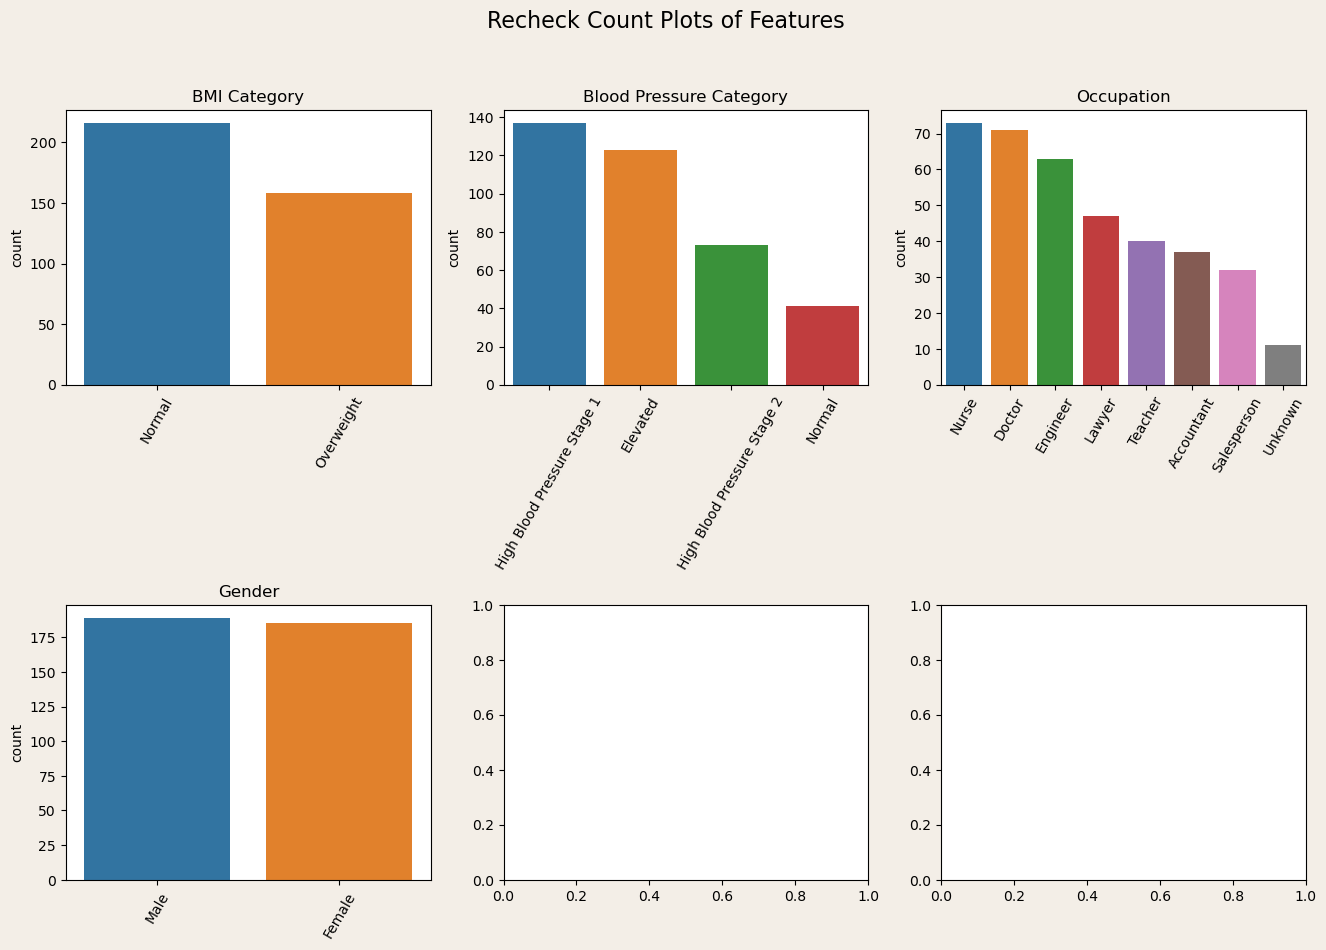

In [21]:
# check new count plots
cols = ["BMI Category", "Blood Pressure Category", "Occupation", "Gender"]

fig, axs = plt.subplots(2, 3, figsize=(16, 10), gridspec_kw={'hspace': 0.8}, facecolor="#F3EEE7")
for i, col in enumerate(cols):
    column_data = df[col]
    order = column_data.value_counts().index
    sns.countplot(x=column_data, order=order, ax=axs[int(i / 3), i % 3])
    axs[int(i / 3), i % 3].set_title(f'{col}')
    axs[int(i / 3), i % 3].tick_params(axis='x', rotation=60)
    axs[int(i / 3), i % 3].set_xlabel("")


plt.suptitle("Recheck Count Plots of Features", fontsize=16)
plt.show()


# Bivariate analysis

*Quantitative comparison*

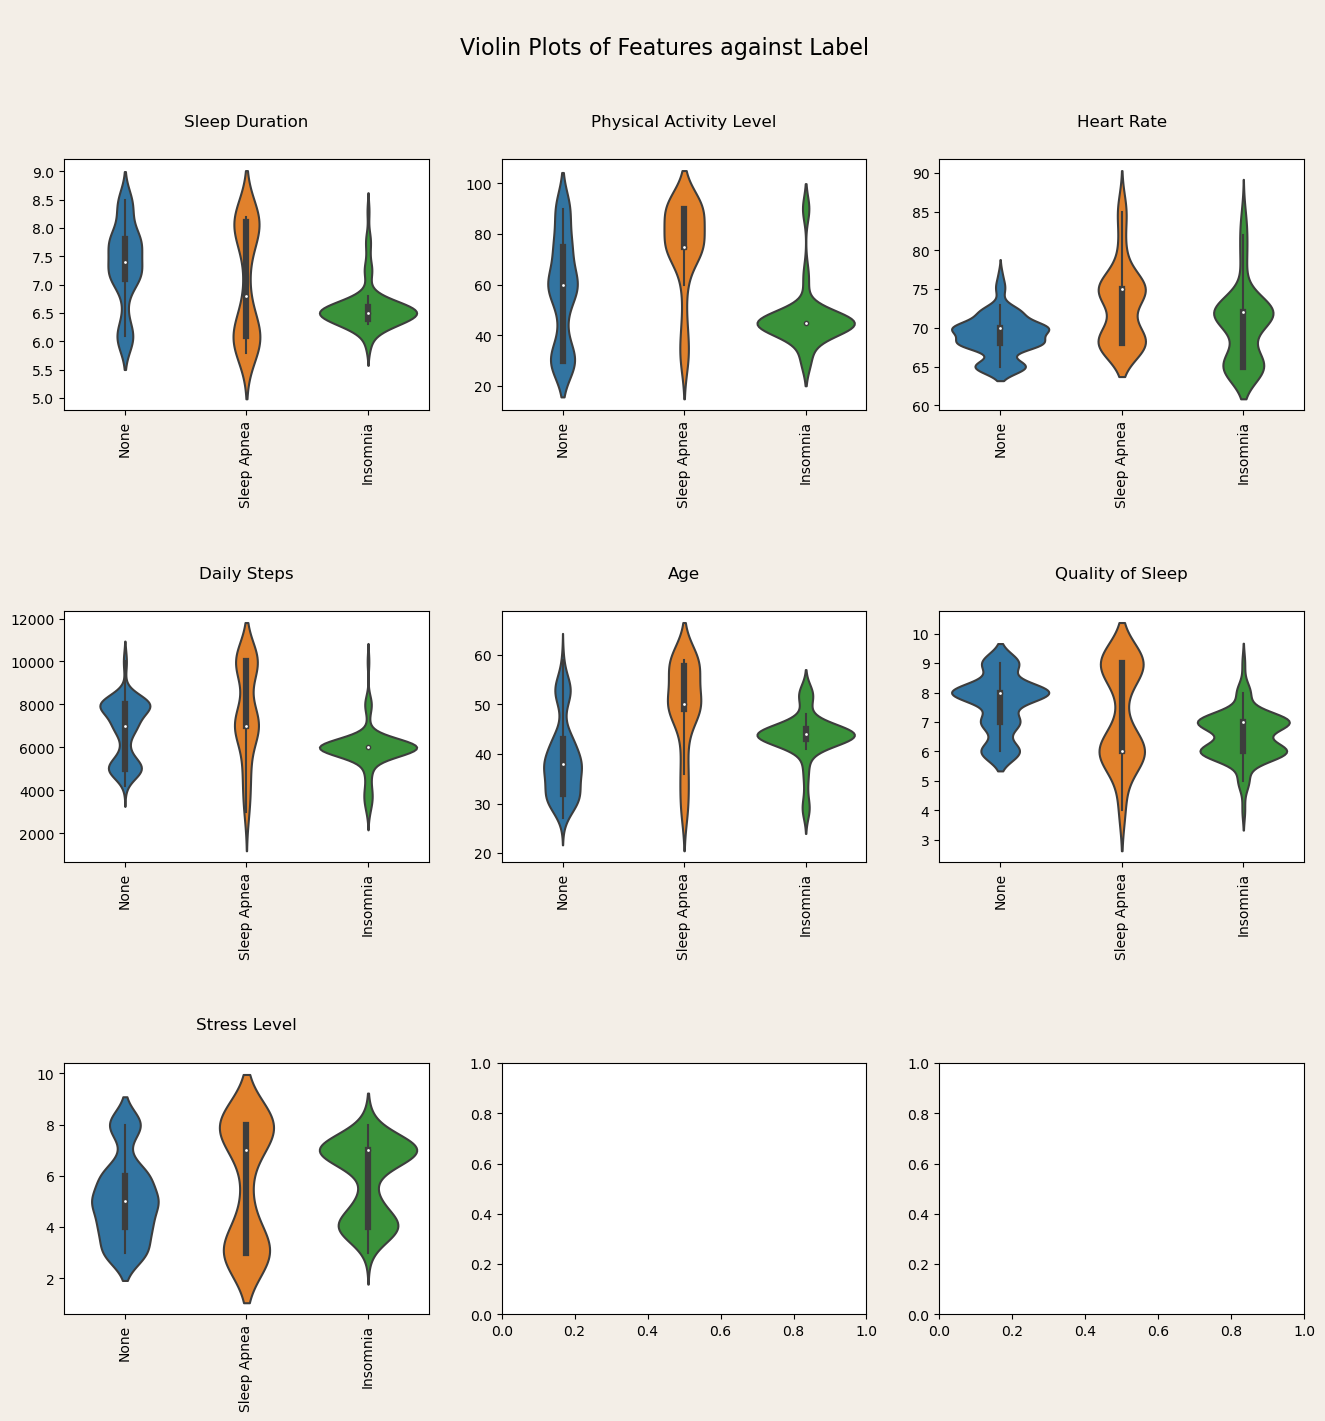

In [22]:
cols = ['Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Age', 'Quality of Sleep', 'Stress Level']
label = 'Sleep Disorder'

fig, axs = plt.subplots(3, 3, figsize=(16, 15), gridspec_kw={'hspace': 0.8}, facecolor="#F3EEE7")
for i, col in enumerate(cols):
    sns.violinplot(data=df, x=label, y=col, medianprops=dict(color="yellow", label='median'), ax=axs[int(i / 3), i % 3])
    axs[int(i / 3), i % 3].set_title(f'{col}', y=1.1)
    axs[int(i / 3), i % 3].tick_params(axis='x', rotation=90)
    axs[int(i / 3), i % 3].set_xlabel("")
    axs[int(i / 3), i % 3].set_ylabel("")
    

plt.suptitle("\nViolin Plots of Features against Label", fontsize=16)
plt.show()

In [23]:
cols = ['Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Age', 'Quality of Sleep', 'Stress Level']
label = 'Sleep Disorder'

for col in cols:
    if col != label:
        result_dict = {i: df[df[label] == i][col].to_list() for i in df[label].unique()}
        anova_results = stats.f_oneway(*result_dict.values())
        print(f"ANOVA result: {col} across categories of {label}")
        print(f"""
F Test Statistic: {np.round(anova_results[0],1)}
p-value: {'{:.20f}'.format(anova_results[1])}
Statistically significant at 0.05 threshold: {anova_results[1] < 0.05}
            """)
        print("+++++++++++++++++++") 
        print()

ANOVA result: Sleep Duration across categories of Sleep Disorder

F Test Statistic: 31.9
p-value: 0.00000000000016261511
Statistically significant at 0.05 threshold: True
            
+++++++++++++++++++

ANOVA result: Physical Activity Level across categories of Sleep Disorder

F Test Statistic: 44.2
p-value: 0.00000000000000000631
Statistically significant at 0.05 threshold: True
            
+++++++++++++++++++

ANOVA result: Heart Rate across categories of Sleep Disorder

F Test Statistic: 32.9
p-value: 0.00000000000006737408
Statistically significant at 0.05 threshold: True
            
+++++++++++++++++++

ANOVA result: Daily Steps across categories of Sleep Disorder

F Test Statistic: 24.8
p-value: 0.00000000007942397163
Statistically significant at 0.05 threshold: True
            
+++++++++++++++++++

ANOVA result: Age across categories of Sleep Disorder

F Test Statistic: 58.4
p-value: 0.00000000000000000000
Statistically significant at 0.05 threshold: True
            
+++++

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Results of ANOVA tests slightly comprimised due to breach of normality assumption but are fairly robust against this for sample sizes far > 30.</li>
    <li>Values of features in the Sleep Apnea class have mostly larger spread of values than None and Apnea</li>
    <li>Values of features in the Insomnia class have a tighter bunching of values than None and Apnea, and tends to exhibit smaller values than Anpea</li>
    <li>Strong suggestion of relationship between "Sleep Duration" and "Sleep Disorder"
        <ul>
            <li>None higher sleep duration than Insomnia</li>
            <li>Apnea has a larger IQR range and appears to bring shorter durations than None and possibly longer than Insomnia</li> 
            <li>Statistic differences between sleep duration for different categories in Sleep Disorder exist</li>
        </ul>
    </li>
    <li>Suggestion of relationship between "Physical Activity Level" and "Sleep Disorder" although doesn't seem logical
        <ul>
            <li>None larger IQR than Insomnia and Apnea</li>
            <li>Apnea appears to have higher physical activity levels than other None which seems counter-intuitive</li> 
            <li>Insomnia shows lower physical activity levels than None and Apnea which could be reasonable. but all data points in IQR are the same (collection issues?) </li> 
            <li>Statistic differences between physical activity level for different categories in Sleep Disorder exist, could be unrepresentative sample or an unrelated feature</li>
        </ul>
    </li>
    <li>Suggestion of relationship between "Heart Rate" and "Sleep Disorder"
        <ul>
            <li>None slightly lower than Apne and Insomnia</li>
            <li>Compared to None, Insomnia and Apnea show upper boundary outliers further away from Q3</li> 
            <li>Statistic differences between heart rate for different categories for Sleep Disorder exist</li>
        </ul>
    </li>
    <li>Suggestion of relationship between "Daily Steps" and "Sleep Disorder" although like physical activity level doesn't seem logical
        <ul>
            <li>None and Apnea have the same median but None has an IQR shifted below that of Apnea which seems counter-intuitive</li>
            <li>Insomnia shows lower daily steps than None and Apnea which could be reasonable. but all data points in IQR are the same (indicative of same collection issues as the Physical Activity Level column)</li> 
            <li>Statistic differences between daily steps for different categories in Sleep Disorder exist, could be unrepresentative sample or an unrelated feature</li>
        </ul>
    </li>
    <li>Strong suggestion of relationship between "Age" and "Sleep Disorder"
        <ul>
            <li>None lower than Apne and Insomnia</li> 
            <li>Statistic differences between age for different categories for Sleep Disorder exist</li>
        </ul>
    </li>
    <li>Suggestion of relationship between "Quality of Sleep" and "Sleep Disorder"
        <ul>
            <li>None consistently higher than Insomnia</li> 
            <li>Apnea has higher values which doens't seem logical but the median is still lower than None</li>
            <li>Statistic differences between sleep quality for different categories in Sleep Disorder exist</li>
        </ul>
    </li>
    <li>Suggestion of relationship between "Stress Level" and "Sleep Disorder"
        <ul>
            <li>None consistently lower than Apnea and Insomnia</li> 
            <li>Statistic differences between stress level for different categories in Sleep Disorder exist</li>
        </ul>
    </li>    
</ul>
</div>


*Categorical comparison*

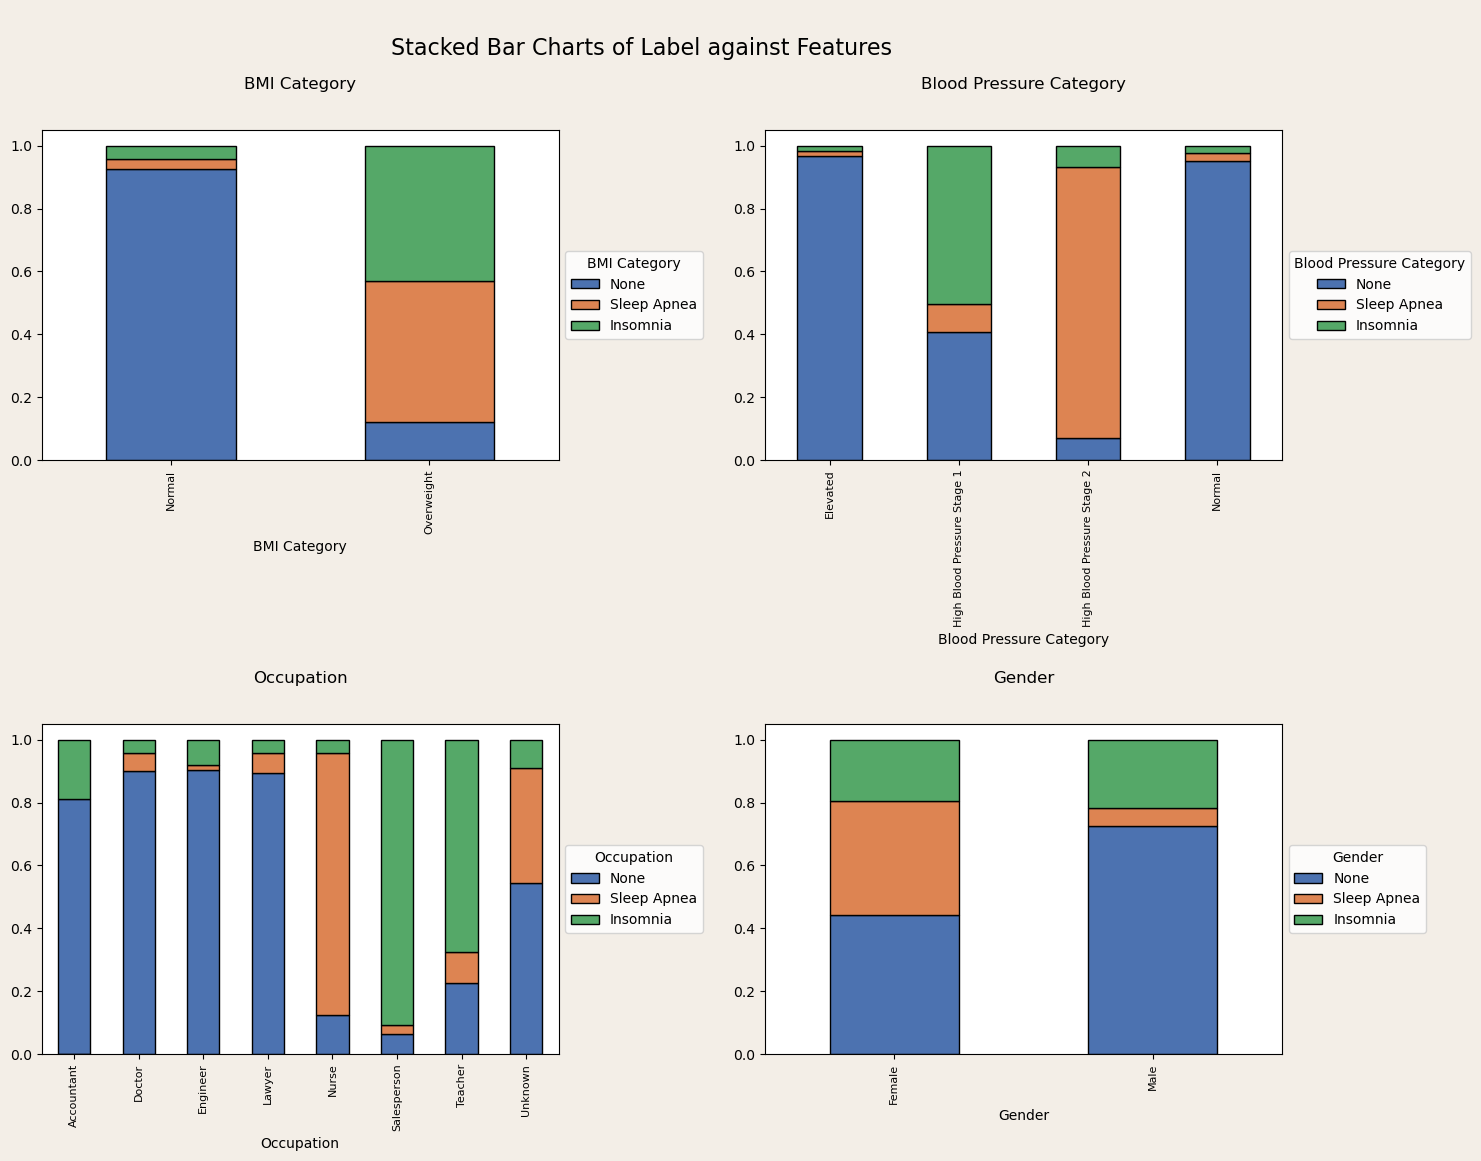

In [24]:
cols = ["BMI Category", "Blood Pressure Category", "Occupation", "Gender"]
label = 'Sleep Disorder'
stack_order=["None", "Sleep Apnea", "Insomnia"]

boxplot_colors = sns.color_palette("deep")[:3]
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'wspace': 0.4, 'hspace': 0.8}, facecolor="#F3EEE7")
for i, col in enumerate(cols):
    props = df.groupby(col)[label].value_counts(normalize=True)
    wide_props = props.unstack().reindex(columns=stack_order)
    wide_props.plot(kind="bar", stacked=True, edgecolor='black', color=boxplot_colors, ax=axs[int(i / 2), i % 2])
    axs[int(i / 2), i % 2].set_title(f'{col}', y=1.1)
    axs[int(i / 2), i % 2].tick_params(axis='x', which='major', labelsize=8, rotation=90)
    axs[int(i / 2), i % 2].legend(title=col, loc='center left', bbox_to_anchor=(1, 0.5))


plt.suptitle("\nStacked Bar Charts of Label against Features", fontsize=16)
plt.show()

In [25]:
cols = ["BMI Category", "Blood Pressure Category", "Occupation", "Gender"]
label = 'Sleep Disorder'

for col in cols:
    if col != label:
        contingency_table = pd.crosstab(df[col], df[label])
        print(f"Contingency table: {col} vs {label}")
        display(contingency_table)
        results = stats.chi2_contingency(contingency_table)
        print(f"""
Chi-Square Test Statistic: {np.round(results[0],1)}
Degrees of freedom: {results[2]}
p-value: {'{:.20f}'.format(results[1])}
Statistically significant at 0.05 threshold: {results[1] < 0.05}
Expected frequency at least 5 in all cases: {len([i for i in results[3].flatten() if i < 5]) == 0}  
            """)
        print("+++++++++++++++++++")  # Add an empty line for separation
        print()

Contingency table: BMI Category vs Sleep Disorder


Sleep Disorder,Insomnia,None,Sleep Apnea
BMI Category,,,
Normal,9,200,7
Overweight,68,19,71



Chi-Square Test Statistic: 244.2
Degrees of freedom: 2
p-value: 0.00000000000000000000
Statistically significant at 0.05 threshold: True
Expected frequency at least 5 in all cases: True  
            
+++++++++++++++++++

Contingency table: Blood Pressure Category vs Sleep Disorder


Sleep Disorder,Insomnia,None,Sleep Apnea
Blood Pressure Category,,,
Elevated,2,119,2
High Blood Pressure Stage 1,69,56,12
High Blood Pressure Stage 2,5,5,63
Normal,1,39,1



Chi-Square Test Statistic: 362.4
Degrees of freedom: 6
p-value: 0.00000000000000000000
Statistically significant at 0.05 threshold: True
Expected frequency at least 5 in all cases: True  
            
+++++++++++++++++++

Contingency table: Occupation vs Sleep Disorder


Sleep Disorder,Insomnia,None,Sleep Apnea
Occupation,,,
Accountant,7,30,0
Doctor,3,64,4
Engineer,5,57,1
Lawyer,2,42,3
Nurse,3,9,61
Salesperson,29,2,1
Teacher,27,9,4
Unknown,1,6,4



Chi-Square Test Statistic: 411.5
Degrees of freedom: 14
p-value: 0.00000000000000000000
Statistically significant at 0.05 threshold: True
Expected frequency at least 5 in all cases: False  
            
+++++++++++++++++++

Contingency table: Gender vs Sleep Disorder


Sleep Disorder,Insomnia,None,Sleep Apnea
Gender,,,
Female,36,82,67
Male,41,137,11



Chi-Square Test Statistic: 54.3
Degrees of freedom: 2
p-value: 0.00000000000161286335
Statistically significant at 0.05 threshold: True
Expected frequency at least 5 in all cases: True  
            
+++++++++++++++++++



<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Potential reasoning for relationship between "Gender" and "Sleep Disorder"
        <ul>
            <li>Men ~ None, Insomnia</li>
            <li>Woman ~ None, Sleep Apnea, Insomnia</li> 
            <li>Statistic differences between categories for Sleep Disorder exist</li>
        </ul>
    </li>
    <li>Potential reasoning for relationship between "Occupation" and "Sleep Disorder"
        <ul>
            <li>Accountant, Doctor, Engineer and Laywer ~ None</li>
            <li>Nurse ~ Apnea</li> 
            <li>Salesperson, Teacher ~ Insomnia</li>
            <li>Statistic differences between categories for Sleep Disorder exist</li>
        </ul>
    </li>
    <li>Strong reasoning for relationship between "BMI Category" and "Sleep Disorder"
        <ul>
            <li>Normal ~ None</li>
            <li>Overweight ~ Insomnia and Apnea</li> 
            <li>Statistic differences between categories for Sleep Disorder exist</li>
        </ul>
    </li>
    <li>Strong reasoning for relationship between "Blood Pressure Category" and "Sleep Disorder"
        <ul>
            <li>Normal ~ None</li>
            <li>Elevated ~ None</li> 
            <li>High Blood Pressure 1 ~ None and Insomnia</li>
            <li>High Blood Pressure 2 ~ Sleep Apnea</li>
            <li>Statistic differences between categories for Sleep Disorder exist</li>
        </ul>
    </li>
</ul>
</div>


In [26]:
df.to_csv(os.path.join(settings.DATA_EDA_DIR, settings.DATA_EDA_FILE), sep=",", header=True, index=False)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Conclusion for EDA:</font></h3>

<ul>
    <li>Dataset has no missing values and is correctly cast.</li>
    <li>Dataset has had a small amount of consolidation of categorical values with features (BMI and Occupation).</li>
    <li>Dataset has had one initial feature created (Blood Pressure Category). Others might follow through iteration.</li>
    <li>All features except "Person ID" will be included in models to begin.
        <ul>
            <li>All features provided visual and statistical support for predictive value</li>
            <li>Iteration to test fewer features will ensue</li> 
        </ul>
    </li>
    <li>Feature scaling will be required for GLMs.</li>
    <li>Categorical features will require encoding.</li>
    <li>Label is unbalanced: Accuracy will not be most informative.</li>
    <li>Appropriate models for task:
        <ul>
            <li>Multinomial Regression (weighted)</li>
            <li>Support Vector Machine?</li>
            <li>Decision Tree Classifier</li>
            <li>Random Forest Classifier</li>
            <li>XGBoost Classifier</li>
            <li>Neural Network?</li> 
        </ul>
    </li>

</ul>
</div>
